In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data=pd.read_csv("ecommerce2.csv")

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,835 Frank Tunnel,NaN,NaN,NaN,NaN,NaN,NaN
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
2,hduke@hotmail.com,4547 Archer Common,NaN,NaN,NaN,NaN,NaN,NaN
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
4,pallen@yahoo.com,24645 Valerie Unions Suite 582,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isna().sum()

Email                     0
Address                   0
Avatar                  500
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     546
dtype: int64

In [6]:
data=data.dropna()

In [7]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,Wrightmouth,"MI 82180-9605""",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
3,Diazchester,"CA 06566-8576""",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
5,Cobbborough,"DC 99414-7564""",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
7,Port Jason,"OH 22070-1220""",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
9,Port Jacobville,"PR 37242-1057""",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
data=data[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

In [10]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,34.497268,12.655651,39.577668,4.082621,587.951054
3,31.926272,11.109461,37.268959,2.664034,392.204933
5,33.000915,11.330278,37.110597,4.104543,487.547505
7,34.305557,13.717514,36.721283,3.120179,581.852344
9,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
data.reset_index(drop=True,inplace=True)

In [12]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


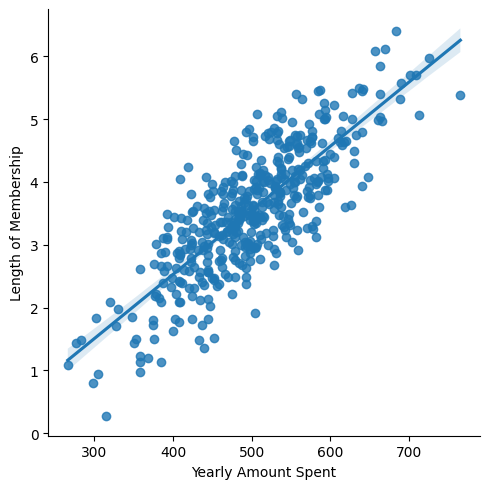

In [13]:
sns.lmplot(x="Yearly Amount Spent",y="Length of Membership",data=data)

<Axes: xlabel='Yearly Amount Spent', ylabel='Length of Membership'>

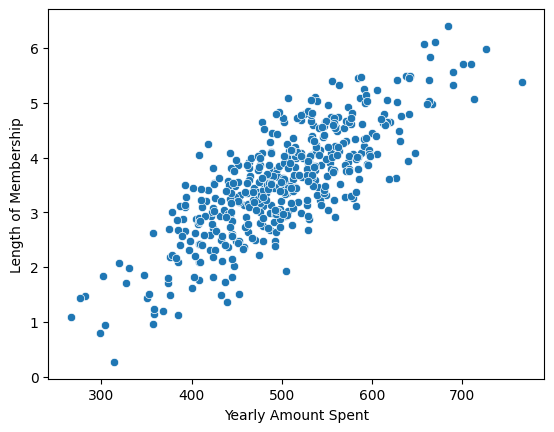

In [14]:
sns.scatterplot(x="Yearly Amount Spent",y="Length of Membership",data=data)

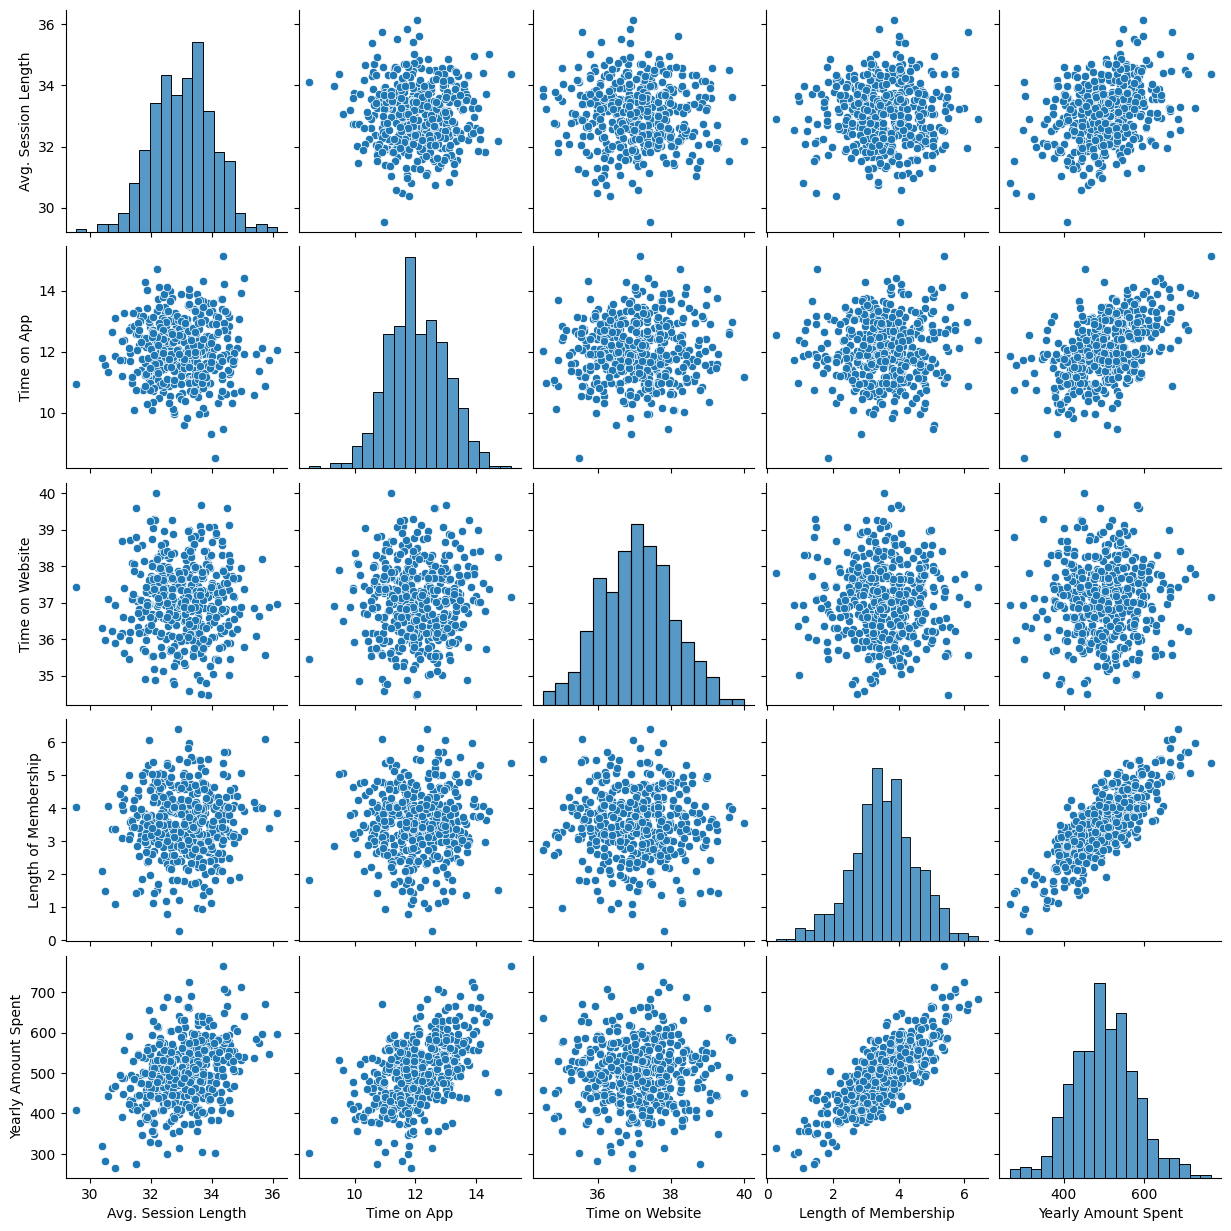

In [15]:
sns.pairplot(data)

In [16]:
X = data.drop("Yearly Amount Spent",axis=1)

In [17]:
y=data["Yearly Amount Spent"]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [19]:
X_test2 = X_test.iloc[0,:]

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
y_pred = model.predict(X_test)

In [23]:
coeffecients =pd.DataFrame(model.coef_,X.columns)
coeffecients.columns=["Coeffecients"]
coeffecients

,Coeffecients
Avg. Session Length,26.124898
Time on App,39.002112
Time on Website,0.815715
Length of Membership,61.506977


In [24]:
model.coef_

array([26.12489795, 39.00211208,  0.81571505, 61.50697688])

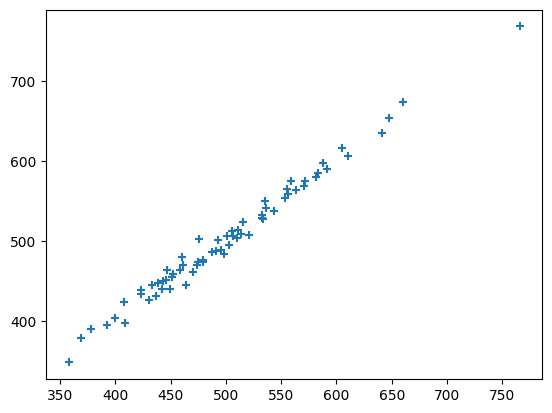

In [25]:
plt.scatter(y_test,y_pred,marker="+")

In [26]:
mean_square_error = mt.mean_squared_error(y_test,y_pred)
mean_absolute_error = mt.mean_absolute_error(y_test,y_pred)

In [27]:
print(f"MSE : {np.sqrt(mean_square_error)}")
print(f"MAE : {mean_absolute_error}")

MSE : 8.96034126950581
MAE : 7.254984384379058


In [28]:
print(f" max value for Yearly Amount Spent :{data["Yearly Amount Spent"].max().round(2)}")

 max value for Yearly Amount Spent :765.52


In [29]:
print(f" min value for Yearly Amount Spent :{data["Yearly Amount Spent"].min().round(2)}")

 min value for Yearly Amount Spent :266.09


In [34]:
print(f" The minimum error in year spent predicted by the model is : {((np.sqrt(mean_square_error)/data["Yearly Amount Spent"].max().round(2))*100).round(2)} %")

 The minimum error in year spent predicted by the model is : 1.17 %


In [35]:
print(f" The maximum error in year spent predicted by the model is : {((np.sqrt(mean_square_error)/data["Yearly Amount Spent"].min().round(2))*100).round(2)} %")

 The maximum error in year spent predicted by the model is : 3.37 %
